# Training and Predicting with no additional features for the three splitting strategies

In order to quantify **the impact of the additional RDKit molecular descriptors** used for training, we also performed parallel training without the 200 molecular features across all splitting methods as reported by **Table S2** in the SI of the paper. 

## Environment setup

To execute this notebook, use the main conda environment (created using environment_main.yaml). If running in terminal activate using:

```bash
conda activate main_DE
```

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

## **Random Splitting**

### **Training on all the data**

In [2]:
#from sklearn.model_selection import train_test_split

#startPBT_correct

# Split the data into training and test sets (80:20)
#train_random_df, test_random_df = train_test_split(startPBT_correct, test_size=0.2, random_state=42)

# Save the split datasets
#train_random_df.to_csv('Splitting_strategy_datasets/new_train2_random_data.csv', index=False)
#test_random_df.to_csv('Splitting_strategy_datasets/new_test2_random_data.csv', index=False)

In [3]:
train_random_df = pd.read_csv('Splitting_strategy_datasets/new_train2_random_data.csv')
train_random_df

,SMILES,PBT_label
0,CCCN(CCC)c1ccc(-c2nc(-c3ccc(N(C)C)cc3)c(-c3ccc...,1
1,C=CC(=O)OCCCCO,0
2,CC(=O)OC1CCC2(C)C(=CCC3C2CCC2(C)C3CCC2(C)OC(C)...,1
3,CCCCOCC1CO1,0
4,CCCCCCCCCCCCCCCCOC(=O)C=CC(=O)O,0
...,...,...
4099,CCCCCCCCCCCCCCCCCC[Si](C)(C)Cl,0
4100,O=C(O)CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,1
4101,O=C(O)C(F)(C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(...,1
4102,c1ccc(C2=NCCN2)cc1,0


In [4]:
test_random_df = pd.read_csv('Splitting_strategy_datasets/new_test2_random_data.csv')
test_random_df

,SMILES,PBT_label
0,CC(CC(C)C)=NCCNCCN=C(C)CC(C)C,0
1,CC(C)c1cccc2cc3c(ccc4ccccc43)cc12,1
2,CCCCCCCCC=CCCCCCCCC(=O)NCC(C)OC(=O)CC(C(=O)O)S...,0
3,CC(=O)OC1CCC2(C)C(CCC3C2CC(=O)C2(C)C3CC3OC4(CC...,1
4,Oc1c(Br)cc(Cc2cc(Br)c(O)c(Br)c2)cc1Br,1
...,...,...
1021,C=C(C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,1
1022,Cc1ccc(Nc2nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n2)cc1,1
1023,FC(F)(Br)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Br,1
1024,CCO[Si](CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,1


To run the model training using `chemprop` in a Bash environment:

Open a new bash shell and execute the following commands:

1. **Activate the Conda Environment**  
   First, make sure to activate the `chemprop_DE` Conda environment to access the required dependencies:
   
   ```bash
   conda activate chemprop_DE
   ```
2. **Run the Training Command**
   ```bash
chemprop_train --data_path Splitting_strategy_datasets/new_train2_random_data.csv \
               --dataset_type classification \
               --save_dir 0fold_outputs/RS_noaddfeatures_results \
               --save_preds
    ```
  - This performed training on all the data, saved the predictions and SMILES splits.

3. **Run the Prediction Command**
   ```bash
chemprop_predict --test_path Splitting_strategy_datasets/new_test2_random_data.csv \
                 --checkpoint_dir 0fold_outputs/RS_noaddfeatures_results/fold_0/ \
                 --preds_path 0fold_outputs/RS_noaddfeatures_results/test_finalrandom_predictions_nofeatures.csv
    ```

after completing the **Predicting command** in bash returns to this notebook

In [5]:
## Elapsed time = 0:02:36

In [6]:
test_final_pred = pd.read_csv('0fold_outputs/RS_noaddfeatures_results/test_finalrandom_predictions_nofeatures.csv')
test_final_pred

,SMILES,PBT_label
0,CC(CC(C)C)=NCCNCCN=C(C)CC(C)C,0.036326
1,CC(C)c1cccc2cc3c(ccc4ccccc43)cc12,0.997069
2,CCCCCCCCC=CCCCCCCCC(=O)NCC(C)OC(=O)CC(C(=O)O)S...,0.000025
3,CC(=O)OC1CCC2(C)C(CCC3C2CC(=O)C2(C)C3CC3OC4(CC...,0.944178
4,Oc1c(Br)cc(Cc2cc(Br)c(O)c(Br)c2)cc1Br,0.980826
...,...,...
1021,C=C(C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,0.999798
1022,Cc1ccc(Nc2nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n2)cc1,0.999057
1023,FC(F)(Br)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Br,0.999710
1024,CCO[Si](CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,0.995414


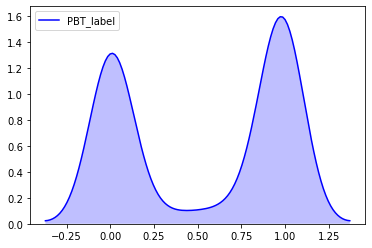

In [7]:
test_fig_preds= sns.kdeplot(test_final_pred['PBT_label'], shade= True, color='b')

### **Find the best cutoff according the following function**

In [8]:
def find_cutoff(probabilities, binary_values):
    # Combine probabilities and binary values into tuples
    data = list(zip(probabilities, binary_values))
    # Sort data by probabilities in descending order
#     sorted_data = sorted(data, key=lambda x: x[0], reverse=True)
    # Initialize variables
    best_cutoff = None
    best_accuracy = 0.0
    cutoffs = list(np.arange(0.0, 1.1, 0.01))
    # Iterate through possible cutoff points
#     for i in range(len(sorted_data)):
    for cutoff in cutoffs:
#         cutoff = sorted_data[i][0]
        predicted_classes = [1 if prob >= cutoff else 0 for prob, _ in data]
        accuracy = len([pred for pred, true in zip(predicted_classes, binary_values) if pred == true]) / len(binary_values)
        # Update best cutoff if accuracy improves
        print(f"Cutoff: {cutoff}, Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_cutoff = cutoff
    return best_cutoff, best_accuracy
 
# Example usage:
probabilities = test_final_pred['PBT_label']
binary_values = test_random_df['PBT_label']
 
cutoff, accuracy = find_cutoff(probabilities, binary_values)
print(f"Best Cutoff: {cutoff}, Best Accuracy: {accuracy}")

Cutoff: 0.0, Accuracy: 0.5116959064327485
Cutoff: 0.01, Accuracy: 0.8430799220272904
Cutoff: 0.02, Accuracy: 0.8586744639376218
Cutoff: 0.03, Accuracy: 0.8645224171539961
Cutoff: 0.04, Accuracy: 0.8732943469785575
Cutoff: 0.05, Accuracy: 0.8801169590643275
Cutoff: 0.06, Accuracy: 0.8879142300194932
Cutoff: 0.07, Accuracy: 0.8888888888888888
Cutoff: 0.08, Accuracy: 0.8927875243664717
Cutoff: 0.09, Accuracy: 0.8937621832358674
Cutoff: 0.1, Accuracy: 0.8976608187134503
Cutoff: 0.11, Accuracy: 0.9005847953216374
Cutoff: 0.12, Accuracy: 0.905458089668616
Cutoff: 0.13, Accuracy: 0.9083820662768031
Cutoff: 0.14, Accuracy: 0.9093567251461988
Cutoff: 0.15, Accuracy: 0.9093567251461988
Cutoff: 0.16, Accuracy: 0.9093567251461988
Cutoff: 0.17, Accuracy: 0.9093567251461988
Cutoff: 0.18, Accuracy: 0.9103313840155945
Cutoff: 0.19, Accuracy: 0.9103313840155945
Cutoff: 0.2, Accuracy: 0.9113060428849903
Cutoff: 0.21, Accuracy: 0.9103313840155945
Cutoff: 0.22, Accuracy: 0.9103313840155945
Cutoff: 0.23, A

In [9]:
test_final_pred['PBT_bin_pred'] = (test_final_pred['PBT_label'] > 0.77).astype(int)
test_final_pred

,SMILES,PBT_label,PBT_bin_pred
0,CC(CC(C)C)=NCCNCCN=C(C)CC(C)C,0.036326,0
1,CC(C)c1cccc2cc3c(ccc4ccccc43)cc12,0.997069,1
2,CCCCCCCCC=CCCCCCCCC(=O)NCC(C)OC(=O)CC(C(=O)O)S...,0.000025,0
3,CC(=O)OC1CCC2(C)C(CCC3C2CC(=O)C2(C)C3CC3OC4(CC...,0.944178,1
4,Oc1c(Br)cc(Cc2cc(Br)c(O)c(Br)c2)cc1Br,0.980826,1
...,...,...,...
1021,C=C(C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,0.999798,1
1022,Cc1ccc(Nc2nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n2)cc1,0.999057,1
1023,FC(F)(Br)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Br,0.999710,1
1024,CCO[Si](CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,0.995414,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc

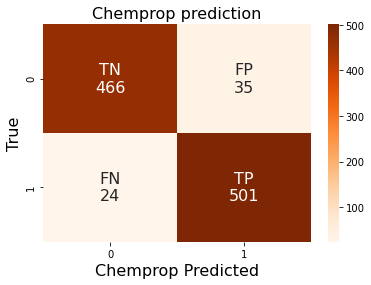

In [11]:
y_true = test_random_df['PBT_label']
y_pred = test_final_pred['PBT_bin_pred']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
ax = sns.heatmap(cm, annot=True, fmt='d',cmap='Oranges' , annot_kws={"size": 16},
            cbar_kws={'shrink': 1, 'orientation': 'vertical'})

# Annotate each cell with the respective quadrant label
quadrant_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        text = ax.texts[i*2+j]
        text.set_text(f'{quadrant_labels[i][j]}\n{text.get_text()}')

plt.xlabel('Chemprop Predicted', fontsize = 16)
plt.ylabel('True', fontsize = 16)
plt.title('Chemprop prediction', fontsize = 16)
#plt.savefig('', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute AUC
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)  

# Specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# Print the results
print(f'AUC: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')


AUC: 0.94
Accuracy: 0.94
Sensitivity (Recall): 0.95
Specificity: 0.93


## **Clustering Splitting**

In [13]:
Clustering_trainmol = pd.read_csv('Splitting_strategy_datasets/new_Clustering_training_PBT.csv')
Clustering_trainmol

,SMILES,PBT_label
0,Cc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,1
1,Clc1ccc2c(Cl)ccnc2c1,0
2,Brc1c(Br)c(Br)c2c(c1Br)Oc1ccccc1O2,1
3,CC(O)C(=O)O,0
4,Cc1ccccc1Cl,0
...,...,...
4059,CN(C)CCCCCCN(C)C,0
4060,CN(C)CCCN(C)C,0
4061,C[N+](C)(C)C1CCCCC1,0
4062,c1ccc(N(CC2CO2)CC2CO2)cc1,0


In [14]:
singleton_testmol = pd.read_csv('Splitting_strategy_datasets/new_singletons_test_PBT.csv')
singleton_testmol

,SMILES,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1
1,C=C(F)C(=O)OC,0
2,S=c1[nH]c2ccccc2s1,0
3,O=S(=O)(O)C(F)(F)F,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1
...,...,...
1060,NCCCN1CCN(CCCN)CC1,0
1061,CC(=O)NNC(C)=O,0
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0
1063,C=CC(=O)NCNC(=O)C=C,0


### **Training on all the data**

To run the model training using `chemprop` in a Bash environment:

Open a new bash shell and execute the following commands:

1. **Activate the Conda Environment**  
   First, make sure to activate the `chemprop_DE` Conda environment to access the required dependencies:
   
   ```bash
   conda activate chemprop_DE
   ```
2. **Run the Training Command**
   ```bash
chemprop_train --data_path Splitting_strategy_datasets/new_Clustering_training_PBT.csv \
               --dataset_type classification \
               --save_dir 0fold_outputs/CS_noaddfeatures_results \
               --save_preds
    ```
  - This performed training on all the data, saved the predictions and SMILES splits.

3. **Run the Prediction Command**
   ```bash
chemprop_predict --test_path Splitting_strategy_datasets/new_singletons_test_PBT.csv \
                 --checkpoint_dir 0fold_outputs/CS_noaddfeatures_results/fold_0/ \
                 --preds_path 0fold_ouputs/CS_noaddfeatures_results/test_finalpredictions_clusterin_noaddfeatures.csv 

    ```

after completing the **Predicting command** in bash returns to this notebook

In [15]:
##Elapsed time = 0:02:31

In [16]:
test_final_pred = pd.read_csv('0fold_outputs/CS_noaddfeatures_results/test_finalpredictions_clusterin_noaddfeatures.csv')
test_final_pred

,SMILES,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,2.055271e-04
1,C=C(F)C(=O)OC,5.755101e-06
2,S=c1[nH]c2ccccc2s1,4.322067e-05
3,O=S(=O)(O)C(F)(F)F,4.685090e-09
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,9.649997e-01
...,...,...
1060,NCCCN1CCN(CCCN)CC1,3.160667e-02
1061,CC(=O)NNC(C)=O,1.073081e-06
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,3.856427e-01
1063,C=CC(=O)NCNC(=O)C=C,2.289458e-03


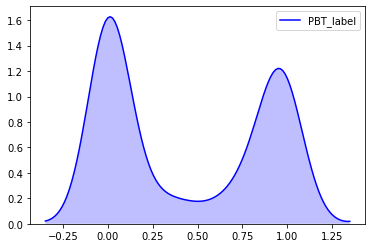

In [17]:
test_fig_preds= sns.kdeplot(test_final_pred['PBT_label'], shade= True, color='b')

In [18]:
probabilities = test_final_pred['PBT_label']
binary_values = singleton_testmol['PBT_label']
 
cutoff, accuracy = find_cutoff(probabilities, binary_values)
print(f"Best Cutoff: {cutoff}, Best Accuracy: {accuracy}")

Cutoff: 0.0, Accuracy: 0.41220657276995304
Cutoff: 0.01, Accuracy: 0.7896713615023474
Cutoff: 0.02, Accuracy: 0.8112676056338028
Cutoff: 0.03, Accuracy: 0.8234741784037559
Cutoff: 0.04, Accuracy: 0.8309859154929577
Cutoff: 0.05, Accuracy: 0.8384976525821596
Cutoff: 0.06, Accuracy: 0.8460093896713615
Cutoff: 0.07, Accuracy: 0.8516431924882629
Cutoff: 0.08, Accuracy: 0.8535211267605634
Cutoff: 0.09, Accuracy: 0.8553990610328639
Cutoff: 0.1, Accuracy: 0.8591549295774648
Cutoff: 0.11, Accuracy: 0.8610328638497653
Cutoff: 0.12, Accuracy: 0.8619718309859155
Cutoff: 0.13, Accuracy: 0.8619718309859155
Cutoff: 0.14, Accuracy: 0.860093896713615
Cutoff: 0.15, Accuracy: 0.8657276995305164
Cutoff: 0.16, Accuracy: 0.8685446009389671
Cutoff: 0.17, Accuracy: 0.8685446009389671
Cutoff: 0.18, Accuracy: 0.8685446009389671
Cutoff: 0.19, Accuracy: 0.8704225352112676
Cutoff: 0.2, Accuracy: 0.8713615023474178
Cutoff: 0.21, Accuracy: 0.8704225352112676
Cutoff: 0.22, Accuracy: 0.8741784037558685
Cutoff: 0.23, 

In [19]:
test_final_pred['PBT_bin_pred'] = (test_final_pred['PBT_label'] > 0.81).astype(int)
test_final_pred

,SMILES,PBT_label,PBT_bin_pred
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,2.055271e-04,0
1,C=C(F)C(=O)OC,5.755101e-06,0
2,S=c1[nH]c2ccccc2s1,4.322067e-05,0
3,O=S(=O)(O)C(F)(F)F,4.685090e-09,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,9.649997e-01,1
...,...,...,...
1060,NCCCN1CCN(CCCN)CC1,3.160667e-02,0
1061,CC(=O)NNC(C)=O,1.073081e-06,0
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,3.856427e-01,0
1063,C=CC(=O)NCNC(=O)C=C,2.289458e-03,0


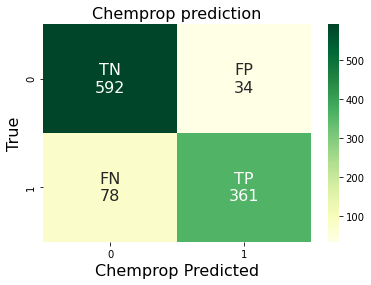

In [20]:
y_true = singleton_testmol['PBT_label']
y_pred = test_final_pred['PBT_bin_pred']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
ax = sns.heatmap(cm, annot=True, fmt='d',cmap='YlGn' , annot_kws={"size": 16},
            cbar_kws={'shrink': 1, 'orientation': 'vertical'})

# Annotate each cell with the respective quadrant label
quadrant_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        text = ax.texts[i*2+j]
        text.set_text(f'{quadrant_labels[i][j]}\n{text.get_text()}')

plt.xlabel('Chemprop Predicted', fontsize = 16)
plt.ylabel('True', fontsize = 16)
plt.title('Chemprop prediction', fontsize = 16)
#plt.savefig('', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute AUC
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)  

# Specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# Print the results
print(f'AUC: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

AUC: 0.88
Accuracy: 0.89
Sensitivity (Recall): 0.82
Specificity: 0.95


## **Cluster-centroids splitting**

In [22]:
Centres_trainmol = pd.read_csv('Splitting_strategy_datasets/new_Cluster_centroids_training_PBT.csv')
Centres_trainmol

,SMILES,PBT_label
0,Clc1ccc2c(Cl)ccnc2c1,0
1,NC(=Nc1ccccc1)Nc1ccccc1,0
2,O=C1OC(c2cc(Br)c(O)c(Br)c2)(c2cc(Br)c(O)c(Br)c...,1
3,COC(=O)C(F)(F)F,0
4,O=C1c2ccccc2C(=O)c2ccccc21,0
...,...,...
579,CC(C)C(NC(N)=O)NC(N)=O,0
580,C[Si](NC1CCCCC1)(NC1CCCCC1)NC1CCCCC1,0
581,O=C1CCCCCN1C(=O)Nc1ccc(Cc2ccc(NC(=O)N3CCCCCC3=...,0
582,CC1(C)CC(N(C=O)CCCCCCN(C=O)C2CC(C)(C)NC(C)(C)C...,0


In [23]:
singleton_testmol = pd.read_csv('Splitting_strategy_datasets/new_singletons_test_PBT.csv')
singleton_testmol

,SMILES,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1
1,C=C(F)C(=O)OC,0
2,S=c1[nH]c2ccccc2s1,0
3,O=S(=O)(O)C(F)(F)F,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1
...,...,...
1060,NCCCN1CCN(CCCN)CC1,0
1061,CC(=O)NNC(C)=O,0
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0
1063,C=CC(=O)NCNC(=O)C=C,0


### **Training on all the data**

To run the model training using `chemprop` in a Bash environment:

Open a new bash shell and execute the following commands:

1. **Activate the Conda Environment**  
   First, make sure to activate the `chemprop_DE` Conda environment to access the required dependencies:
   
   ```bash
   conda activate chemprop_DE
   ```
2. **Run the Training Command**
   ```bash
chemprop_train --data_path Splitting_strategy_datasets/new_Cluster_centroids_training_PBT.csv \
               --dataset_type classification \
               --save_dir 0fold_outputs/CC_noaddfeatures_results  \
               --save_preds
    ```
  - This performed training on all the data, saved the predictions and SMILES splits.

3. **Run the Prediction Command**
   ```bash
chemprop_predict --test_path Splitting_strategy_datasets/new_singletons_test_PBT.csv \
                 --checkpoint_dir 0fold_outputs/CC_noaddfeatures_results/fold_0/ \
                 --preds_path 0fold_outputs/CC_noaddfeatures_results/test_clustercentroids_predictions.csv

    ```

after completing the **Predicting command** in bash returns to this notebook

In [24]:
##Elapsed time = 0:00:21

In [25]:
test_final_pred = pd.read_csv('0fold_outputs/CC_noaddfeatures_results/test_clustercentroids_predictions.csv')
test_final_pred

,SMILES,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,0.206140
1,C=C(F)C(=O)OC,0.000061
2,S=c1[nH]c2ccccc2s1,0.007588
3,O=S(=O)(O)C(F)(F)F,0.000006
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,0.683643
...,...,...
1060,NCCCN1CCN(CCCN)CC1,0.194429
1061,CC(=O)NNC(C)=O,0.000041
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0.275293
1063,C=CC(=O)NCNC(=O)C=C,0.000055


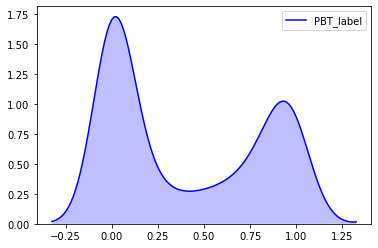

In [26]:
test_fig_preds= sns.kdeplot(test_final_pred['PBT_label'], shade= True, color='b')

In [27]:
probabilities = test_final_pred['PBT_label']
binary_values = singleton_testmol['PBT_label']
 
cutoff, accuracy = find_cutoff(probabilities, binary_values)
print(f"Best Cutoff: {cutoff}, Best Accuracy: {accuracy}")

Cutoff: 0.0, Accuracy: 0.41220657276995304
Cutoff: 0.01, Accuracy: 0.752112676056338
Cutoff: 0.02, Accuracy: 0.7727699530516432
Cutoff: 0.03, Accuracy: 0.780281690140845
Cutoff: 0.04, Accuracy: 0.7915492957746478
Cutoff: 0.05, Accuracy: 0.7990610328638498
Cutoff: 0.06, Accuracy: 0.8093896713615023
Cutoff: 0.07, Accuracy: 0.8103286384976526
Cutoff: 0.08, Accuracy: 0.8169014084507042
Cutoff: 0.09, Accuracy: 0.8234741784037559
Cutoff: 0.1, Accuracy: 0.8262910798122066
Cutoff: 0.11, Accuracy: 0.828169014084507
Cutoff: 0.12, Accuracy: 0.831924882629108
Cutoff: 0.13, Accuracy: 0.8347417840375587
Cutoff: 0.14, Accuracy: 0.8356807511737089
Cutoff: 0.15, Accuracy: 0.8394366197183099
Cutoff: 0.16, Accuracy: 0.8413145539906103
Cutoff: 0.17, Accuracy: 0.8403755868544601
Cutoff: 0.18, Accuracy: 0.8403755868544601
Cutoff: 0.19, Accuracy: 0.844131455399061
Cutoff: 0.2, Accuracy: 0.8450704225352113
Cutoff: 0.21, Accuracy: 0.844131455399061
Cutoff: 0.22, Accuracy: 0.8460093896713615
Cutoff: 0.23, Accur

In [28]:
test_final_pred['PBT_bin_pred'] = (test_final_pred['PBT_label'] > 0.32).astype(int)
test_final_pred

,SMILES,PBT_label,PBT_bin_pred
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,0.206140,0
1,C=C(F)C(=O)OC,0.000061,0
2,S=c1[nH]c2ccccc2s1,0.007588,0
3,O=S(=O)(O)C(F)(F)F,0.000006,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,0.683643,1
...,...,...,...
1060,NCCCN1CCN(CCCN)CC1,0.194429,0
1061,CC(=O)NNC(C)=O,0.000041,0
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0.275293,0
1063,C=CC(=O)NCNC(=O)C=C,0.000055,0


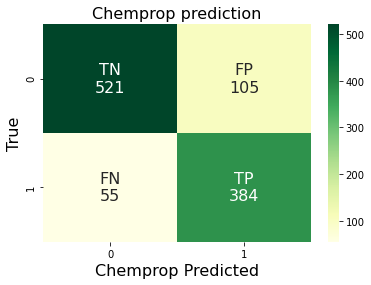

In [29]:
y_true = singleton_testmol['PBT_label']
y_pred = test_final_pred['PBT_bin_pred']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
ax = sns.heatmap(cm, annot=True, fmt='d',cmap='YlGn' , annot_kws={"size": 16},
            cbar_kws={'shrink': 1, 'orientation': 'vertical'})

# Annotate each cell with the respective quadrant label
quadrant_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        text = ax.texts[i*2+j]
        text.set_text(f'{quadrant_labels[i][j]}\n{text.get_text()}')

plt.xlabel('Chemprop Predicted', fontsize = 16)
plt.ylabel('True', fontsize = 16)
plt.title('Chemprop prediction', fontsize = 16)
#plt.savefig('', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute AUC
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)  

# Specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# Print the results
print(f'AUC: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

AUC: 0.85
Accuracy: 0.85
Sensitivity (Recall): 0.87
Specificity: 0.83
